In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('../results/annotations/annotations.csv')

In [3]:
# List of strings to match annotations
strings_to_match = ['c:', 'c;','uco','ecc','c ']
strings_to_match_lower = [s.lower() for s in strings_to_match]


In [4]:
# Drop rows with missing values in the 'Description' column
df.dropna(subset=['Description'], inplace=True)

In [5]:
# Convert annotation strings to lowercase and filter annotations
filtered_annotations = df[df['Description'].str.lower().str.startswith(tuple(strings_to_match_lower))]


In [6]:
print(filtered_annotations)


        HUPID            FileName    StartTime      EndTime  \
17626  HUP201  HUP201_phaseII_D01  89993.93967  89993.93967   
17627  HUP201  HUP201_phaseII_D01  89996.58030  89996.58030   
17629  HUP201  HUP201_phaseII_D01  90002.74436  90002.74436   
17630  HUP201  HUP201_phaseII_D01  90005.19748  90005.19748   
17632  HUP201  HUP201_phaseII_D01  90008.73655  90008.73655   
...       ...                 ...          ...          ...   
32394  HUP260      HUP260_phaseII  29132.25385  29132.25385   
32397  HUP260      HUP260_phaseII  29142.25581  29142.25581   
32398  HUP260      HUP260_phaseII  29142.25581  29142.25581   
32445  HUP260      HUP260_phaseII  34417.39838  34417.39838   
32446  HUP260      HUP260_phaseII  34417.39838  34417.39838   

                                               Type  \
17626                                  ECC: arousal   
17627                                   C: blinking   
17629           C: continued blinking, moves in bed   
17630                  

In [7]:
# How many unique patients
unique_hupids = filtered_annotations['HUPID'].unique()

In [8]:
print(unique_hupids)

['HUP201' 'HUP205' 'HUP206' 'HUP208' 'HUP209' 'HUP214' 'HUP215' 'HUP216'
 'HUP218' 'HUP219' 'HUP221' 'HUP223' 'HUP224' 'HUP225' 'HUP227' 'HUP229'
 'HUP230' 'HUP233' 'HUP235' 'HUP238' 'HUP241' 'HUP242' 'HUP246' 'HUP247'
 'HUP249' 'HUP250' 'HUP251' 'HUP252' 'HUP256' 'HUP257' 'HUP260']


In [9]:
# so 31 patients, 614 annotations

In [13]:
# TF-IDF Vectorization
seizure_descriptions = filtered_annotations['Description'].tolist()
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(seizure_descriptions)


In [14]:
# Step 3: Clustering
# K-means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_features)

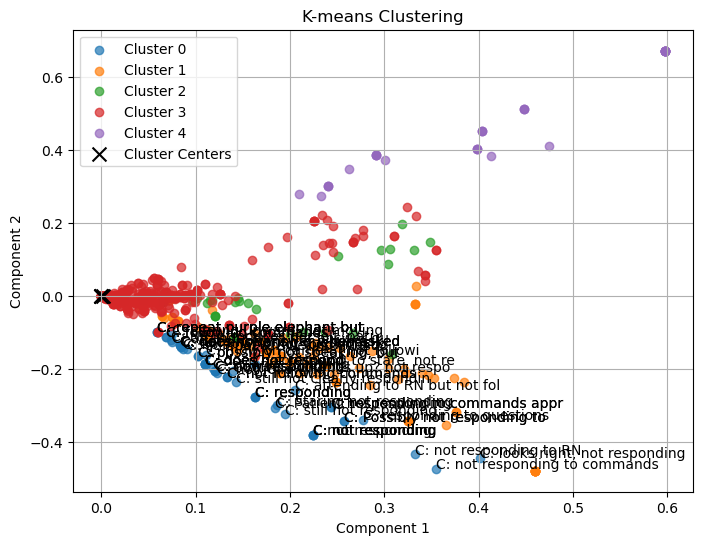

In [20]:
# Reduce dimensionality for visualization (optional)
svd = TruncatedSVD(n_components=2)
tfidf_features_reduced = svd.fit_transform(tfidf_features)

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    plt.scatter(tfidf_features_reduced[cluster_indices, 0],
                tfidf_features_reduced[cluster_indices, 1],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Plot cluster means (centroids)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', s=100, c='k', label='Cluster Centers')

# Annotate label descriptions for cluster 1
cluster_1_indices = np.where(cluster_labels == 0)[0]
for idx in cluster_1_indices:
    plt.annotate(seizure_descriptions[idx][:30], (tfidf_features_reduced[idx, 0], tfidf_features_reduced[idx, 1]))

plt.title('K-means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()